Will do 3 projects using ANN:
1. `Binary` Classification
2. `Multiclass` Classification
3. `Regression`

<center> <h2 style="background-color:orange; color:white" ><br>Neural Networks<br></h2></center>

[CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/optimization-2/)

## Types of Neural Networks

5 main types are:
1. **`Multi Layer Perceptron`** ==> Simple type of `ANN`
    * MLP can be used in Classification and Regression types of Problems
    * If you want to capture non-linear relationships
        * Add more hiddent layers and you will capture more hidden relationship
2. **`CNN`** ==> mostly used in `Image and Video processing`
    * type of ANN having atlest one layer of Convolution in it
    * input layer --> Convulation layer --> pading layer --> fully connected layer --> output layer [pooling can't be ignored]
* Above two NN are FeedForword type, but in RNN results FeedsBacword inside Hidden layers
3. **`RNN`** ==> mostly used in NLP
    1. `LSTM`** ==> Good variation of RNN
4. **`Auto Encoders`** ==> used in cases where one dont want to loose quality
    * Compress an image/file/video without loosing quality of that image
    * `input layers` and `output layers` will have equal number of nodes but `hidden layers` will have less nodes
5. **`GAN`** ==> ANN can imagin
    * Lan goodfellow
    * All about Generator[generate somthing] and Discriminator[discriminate if generated somthing is fake or real]
        * AIM: `Generator have to fool discriminator`

<center> <h4 style="background-color:orange; color:white" ><br>Perceptron<br></h4></center>

Perceptron is the fundamental think of deep learning
1. `What is a Perceptron?`
2. `Traning a Perceptron`
3. `What are some problem in Perceptron?? Why multi-layer Perceptron???`
4. `Why are multi-layer Perceptron?`

* Perceptron is an algorith/mathematical model/mathematical function like Linear Regression or Logistic Regression
    * It is a binary classifier
* Used for ==> Supervised Machine Learning
* Because of it's design it becomes building block of deep learning

Perceptron training(learning) means telling `weights` and `biases` to Perceptron
* `weights` ==> tells feature importance

[perceptron-learning-algorithm-how-it-works Link](https://www.upgrad.com/blog/perceptron-learning-algorithm-how-it-works/)<br>
[single-layer-perceptron-in-tensorflow Link](https://www.javatpoint.com/single-layer-perceptron-in-tensorflow)

* Perceptron can't capture non-linear relationships

<center> <h4 style="background-color:orange; color:white" ><br>Forward Propogation<br></h4></center>

**`How a NN predicts output?`**

<center> <h4 style="background-color:orange; color:white" ><br>Back Propogation<br></h4></center>



**`AIM`** is to Solve a `Binary Classification Problem` using `ANN`

In [1]:
import numpy as np
import pandas as pd

In [2]:

data = pd.read_csv("C:\\Users\\dhuma\\Downloads\\Churn_Modelling (1).csv")

In [3]:
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.duplicated().sum()

0

Imbalanced Problem

In [7]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
df = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False


In [10]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [11]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

In [12]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [13]:
from sklearn.preprocessing import StandardScaler

scal = StandardScaler()

train_x_scal = scal.fit_transform(train_x)
test_x_scal = scal.fit_transform(test_x)

In [14]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

There will be:
1. 1 input layer
2. 1 hidden layer ==> will put 3 nodes/perceptron in hidden layer
3. 1 output layer

In [15]:
model = Sequential()

#input layer
model.add(Dense(3,activation='sigmoid',input_dim=11))
#output layer
model.add(Dense(1,activation='sigmoid'))

C:\Users\dhuma\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

**`model compilation stage`**<br>
1. Decide which loss function to use
2. Decide which optimizer to use for Gradean Descent

In [17]:
#binary_crossentropy or can say log loss 
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [18]:
hist = model.fit(train_x_scal, train_y,epochs=10)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7049
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5781
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5140
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4760
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4661
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4553
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4464
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4454
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4275
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4309


In [19]:
hist.history

{'loss': [0.6640878915786743,
  0.5561785101890564,
  0.503091037273407,
  0.47599363327026367,
  0.4608255922794342,
  0.45087605714797974,
  0.4433183968067169,
  0.43729448318481445,
  0.4325925409793854,
  0.4291820228099823]}

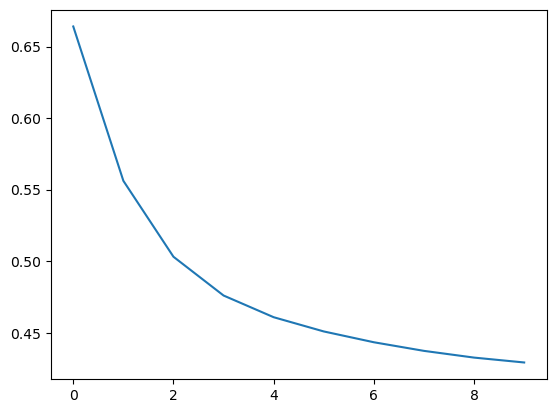

In [20]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

Here we have all `Weights and Biases` of our model <br>
Lets check all `Weights and Biases` of model now


In [21]:
#weights and biasee for layer 0
model.layers[0].get_weights()

[array([[ 0.22614907, -0.12556536,  0.23237145],
        [-1.4980705 , -1.8444362 ,  1.3167459 ],
        [ 0.06457691,  0.1920822 ,  0.23220135],
        [-0.31590837, -0.45444596,  0.6776738 ],
        [ 0.10785902,  0.04860418, -0.2242026 ],
        [ 0.11421554,  0.02692993, -0.12060806],
        [ 0.7564627 ,  0.5217347 , -0.3621826 ],
        [-0.18494648,  0.22769035,  0.28146708],
        [-0.5162916 , -0.48353505,  0.27704886],
        [ 0.03981205,  0.10584639,  0.11064837],
        [ 0.3985503 ,  0.55368274, -0.7446469 ]], dtype=float32),
 array([ 0.56510204,  0.34108305, -0.24398243], dtype=float32)]

In [22]:
#weights and biasee for layer 1
model.layers[1].get_weights()

[array([[-1.3302383 ],
        [-0.85178053],
        [ 0.41565785]], dtype=float32),
 array([-0.4789009], dtype=float32)]

In [23]:
#predictions 
model.predict(test_x_scal)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.19917737],
       [0.11829546],
       [0.1226958 ],
       ...,
       [0.11355889],
       [0.10129723],
       [0.08716298]], dtype=float32)

We are using sigmoid and this output is thats why in prob not classes <br>
To find exact threshold we use AUC-ROC curve but for now say 5

In [24]:
#output in classes now
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(test_y,y_pred)

0.787

**`How to change ANN Architecture for more accuracy improvement`** <br>
This can be improved by:
1. Hidden layer activation fucntion to `ReLue`
2. Increase Epoch to `1000`
3. Increase number of nodes in Hidden layer say `8` or 10
4. Increase number of Hidden Layers  ==> can lead to overfitting

In [26]:
model = Sequential()

#input layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
#output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

C:\Users\dhuma\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#binary_crossentropy or can say log loss 
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist_ = model.fit(train_x_scal, train_y,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7595 - loss: 0.5706 - val_accuracy: 0.8100 - val_loss: 0.4622
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7941 - loss: 0.4651 - val_accuracy: 0.8106 - val_loss: 0.4392
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8071 - loss: 0.4362 - val_accuracy: 0.8156 - val_loss: 0.4314
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8187 - loss: 0.4230 - val_accuracy: 0.8156 - val_loss: 0.4273
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.4247 - val_accuracy: 0.8169 - val_loss: 0.4243
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8227 - loss: 0.4219 - val_accuracy: 0.8175 - val_loss: 0.4200
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.4198 - val_accuracy: 0.8188 - val_loss: 0.4183
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8264 - loss: 0.4115 - val_accu

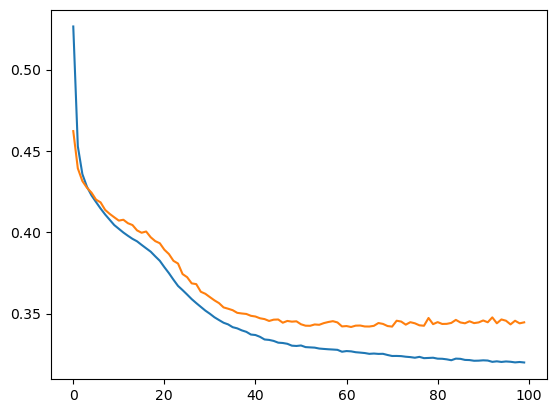

In [28]:
plt.plot(hist_.history['loss'])
plt.plot(hist_.history['val_loss'])
plt.show()

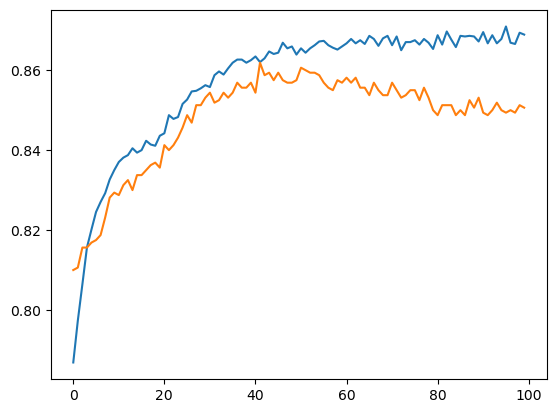

In [29]:
plt.plot(hist_.history['accuracy'])
plt.plot(hist_.history['val_accuracy'])
plt.show()

Overfitting
1. Regularization
2. Dropout can be used

In [30]:
#output in classes now
y_pred = np.where(model.predict(test_x_scal)>0.5,1,0)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
accuracy_score(test_y,y_pred)

0.856

<center> <h4 style="background-color:orange; color:white" ><br>MultiClass Classification Problem using ANN<br></h4></center>

Will use MNIST dataset here we have:
1. 70k images
2. Each image shape is `28*28` i.e `784 pixels` for every image

----
* `Input layer` ==> `784 nodes [one node for each pixel]` => i.e. each pixel will have one input node
    * `weights & biases` ==> 784 * 128 + 128
* `Hidden Layer` ==> `128 nodes`
    * `weights & biases` ==> 128 * 10 + 10
* `Output layer` ==> `10 nodes` ==> i.e. one node for each class say from 0 to 9 <== multiclass classification problem

In [32]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 136s 12us/step


In [33]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [34]:
x_train.shape

(60000, 28, 28)

There are `60k images` with each image of dimension `28*28` in train set, rest of `10k images` are in x_test

In [35]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Data is in form of pixels

In [36]:
#pixels value of first image 
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Image pixels are saved row wise <br>
Lets see image now

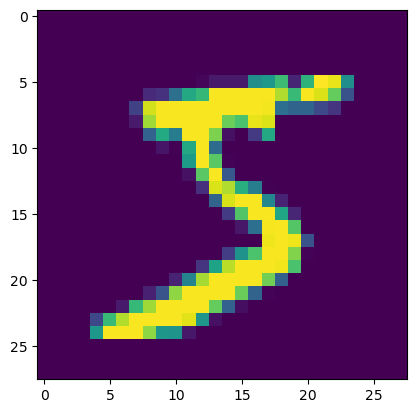

In [37]:
plt.imshow(x_train[0])
plt.show()

**`AIM is to make a NN that will understand based on pixels values which digit is in given image`**<br>
See above arrays they have values ranging from `0-255` which need to be grounded to a range of `0-1` Why??<br>
* It will help NN to converge faster i.e learn weights and biases fast

Lets divide all values with 255

In [38]:
x_train = x_train / 255
x_test = x_test / 255

In [39]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

All values are in range of 0 to 1 now <br>
`Lets make a ANN now`

Some problem:
1. data is in form of 2-D araay ==> 28*28 

But we have 784 input nodes so we have to flatten above data and reshape it from this shape 28*28 to this shape 784

In [40]:
from tensorflow.keras.layers import Dense,Flatten

Flatten layer convers high dimensions layer to 1-D

In [41]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #changing 28*28 to 784 nodes
model.add(Dense(128,activation='relu')) #no need to given number of input as Flatten output will become input bydefault
model.add(Dense(10,activation='softmax'))

C:\Users\dhuma\miniconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**`NOTE`**<br>
If you have more then 1 node in output ==> use softmax for classification

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

* (input)784 * 128(nodes) + 128(biases) ==> `100480` <== trainable params
* (hidden layer node)128 * 10(output layer nodes) + 10(biases) ==> `1290` <== trainable params

In [43]:
#model compilation
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#train model
hist = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8676 - loss: 0.4739 - val_accuracy: 0.9558 - val_loss: 0.1572
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9618 - loss: 0.1340 - val_accuracy: 0.9656 - val_loss: 0.1178
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9748 - loss: 0.0853 - val_accuracy: 0.9688 - val_loss: 0.1010
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9832 - loss: 0.0599 - val_accuracy: 0.9728 - val_loss: 0.0883
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9861 - loss: 0.0466 - val_accuracy: 0.9734 - val_loss: 0.0881
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9889 - loss: 0.0376 - val_accuracy: 0.9731 - val_loss: 0.0919
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9922 - loss: 0.0292 - val_accuracy: 0.9755 - val_loss: 0.0885
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9931 - loss: 0.0233 - 

* in `sparse_categorical_crossentropy` ==> no need to one-hot encode labels i.e. 0 to 9
* in `categorical_crossentropy` ==> need to one-hot encode labels i.e. 0 to 9

In [44]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


It is giving probability for different number from 0 to 9 <br>
Aim to find out which number is the given input off, so :
* take out max value index position out of above array

In [45]:
y_pred = y_prob.argmax(axis=1)
y_pred 

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [46]:
accuracy_score(y_test,y_pred)

0.9773

**`How to change ANN Architecture for more accuracy improvement`** <br>
This can be improved by:
1. Hidden layer activation fucntion
2. Increase Epoch to `1000`
3. Increase number of nodes in Hidden layer say `2`
4. Increase number of Hidden Layers  ==> can lead to overfitting

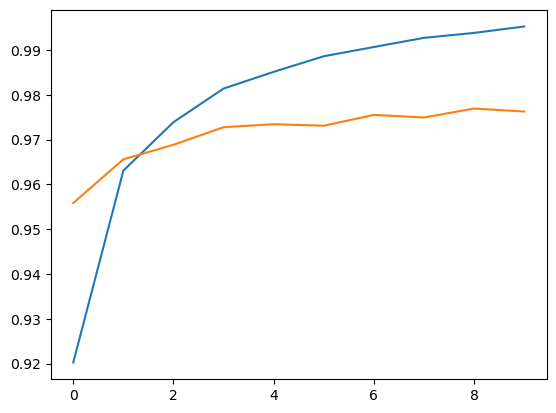

In [47]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

Overfitting

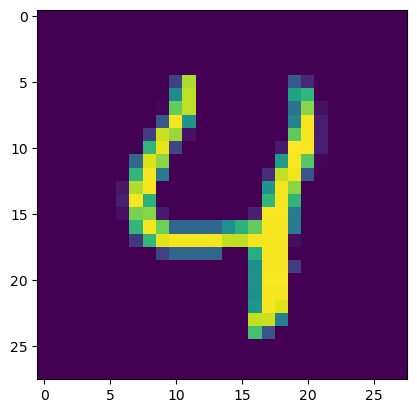

In [48]:
plt.imshow(x_test[4])

In [49]:
# lets see how it is predicting
model.predict(x_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([4], dtype=int64)

<center> <h4 style="background-color:orange; color:white" ><br>Regression Problem using ANN<br></h4></center>

In [51]:

data = pd.read_csv("C:\\Users\\dhuma\\Downloads\\Admission_Predict_Ver1.1.csv")
data.shape

(500, 9)

In [52]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [53]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [55]:
data.drop(columns=['Serial No.'],inplace=True)

In [56]:
data.shape

(500, 8)

In [57]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [58]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=108)

train_x.shape,train_y.shape,test_x.shape,test_y.shape

((400, 7), (400,), (100, 7), (100,))

In [59]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

train_x_scale = scale.fit_transform(train_x) #scaled np array
test_x_scale = scale.fit_transform(test_x)   #scaled np array

In [60]:
 model = Sequential()
    
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='linear')) #as this is Regression problem

C:\Users\dhuma\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.1146 - val_loss: 0.9771
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9227 - val_loss: 0.7745
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7065 - val_loss: 0.6061
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5859 - val_loss: 0.4671
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4353 - val_loss: 0.3525
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3059 - val_loss: 0.2534
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2226 - val_loss: 0.1794
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1678 - val_loss: 0.1332
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1320 - val_loss: 0.1059
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1041 - val_loss: 0.0907


In [63]:
#prediction
y_pred = model.predict(test_x_scale)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [64]:
from sklearn.metrics import r2_score

r2_score(test_y,y_pred)

-4.248090843835099

Performance is not that good <br>
Lets upgrade it's architecture

In [65]:
 model = Sequential()
    
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) #as this is Regression problem

C:\Users\dhuma\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss='mean_squared_error',optimizer='Adam')

hist = model.fit(train_x_scale,train_y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.3629 - val_loss: 0.3011
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2804 - val_loss: 0.2303
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2201 - val_loss: 0.1727
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1594 - val_loss: 0.1250
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1164 - val_loss: 0.0863
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0769 - val_loss: 0.0573
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 - val_loss: 0.0376
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - val_loss: 0.0259
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0247 - val_loss: 0.0191
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - val_loss: 0.0147
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - val_loss: 0.0116
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [70]:
#prediction
y_pred = model.predict(test_x_scale)

r2_score(test_y,y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.7192809856396425

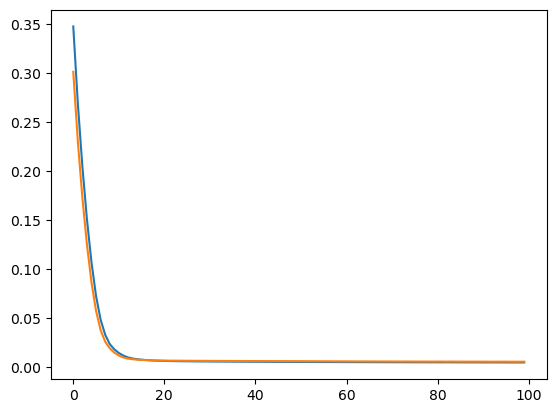

In [69]:
#plotting training and validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()